In [1]:
"""
<패션 MNIST 데이터 사용>
1. 라이브러리 불러오기
2. 데이터 읽어들이기
3. 데이터 스케일링하기
4. 훈련:검증 =8:2로 분리하기
"""

'\n<패션 MNIST 데이터 사용>\n1. 라이브러리 불러오기\n2. 데이터 읽어들이기\n3. 데이터 스케일링하기\n4. 훈련:검증 =8:2로 분리하기\n'

In [2]:
# 텐서플로우 프레임워크
import tensorflow as tf

# 케라스(딥러닝 모델) 라이브러리
from tensorflow import keras

# 시각화 라이브러리
import matplotlib.pyplot as plt

# 넘파이
import numpy as np

# 데이터 분류 라이브러리
from sklearn.model_selection import train_test_split

# 딥러닝 랜덤규칙 정의(모든 사람이 정확하게 일치하지는 않음)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

X_train_scaled, X_val_scaled, y_train, y_val  = train_test_split(X_train_scaled, y_train, random_state=42, test_size=0.2)

In [4]:
"""
 - 함수 이름 : get_model
 - 매개변수 : add_layer(은닉계층이 있으면 중간계층 추가)
 - 모델 변수명 : model
 - 입력계층 : 1차원 전처리 계층 사용
 - 은닉계층 추가
    * add_layer의 값이 None이 아니며, 넘겨받은 은닉계층 add()로 추가
    * add_layer의 값이 None이면, 은닉계층 추가하지 않기
 - 출력계층 추가
 - 모델 반환하기
"""

'\n - 함수 이름 : get_model\n - 매개변수 : add_layer(은닉계층이 있으면 중간계층 추가)\n - 모델 변수명 : model\n - 입력계층 : 1차원 전처리 계층 사용\n - 은닉계층 추가\n    * add_layer의 값이 None이 아니며, 넘겨받은 은닉계층 add()로 추가\n    * add_layer의 값이 None이면, 은닉계층 추가하지 않기\n - 출력계층 추가\n - 모델 반환하기\n'

In [80]:
def get_model(add_layer=None):
    model = keras.Sequential()

    model.add(
        keras.layers.Flatten(
            input_shape=(28,28),
            name="Flatten_input_Layer"
        )
    )
    if add_layer:
        for units in add_layer:
            model.add(
                keras.layers.Dense(
                    units=units,
                    activation="relu"
                )
            )
    model.add(
        keras.layers.Dense(
            units=10,
            activation="softmax",
            name="Output_Layer"
        )
    )
    return model


In [6]:
model1 = get_model([100, 50])

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_input_Layer (Flatte  (None, 784)              0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 Output_Layer (Dense)        (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.compile(
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",
    
)

In [10]:
model1.fit(X_train_scaled, y_train, epochs=5, verbose=0)

In [11]:
model1.fit(X_train_scaled, y_train, epochs=5, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3161 - accuracy: 0.8869
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8894
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.8923
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2993 - accuracy: 0.8967
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8971


In [17]:
history = model1.fit(X_train_scaled, y_train, epochs=50, verbose=2)

Epoch 1/50
1500/1500 - 2s - loss: 0.2662 - accuracy: 0.9116 - 2s/epoch - 2ms/step
Epoch 2/50
1500/1500 - 3s - loss: 0.2647 - accuracy: 0.9109 - 3s/epoch - 2ms/step
Epoch 3/50
1500/1500 - 2s - loss: 0.2598 - accuracy: 0.9116 - 2s/epoch - 2ms/step
Epoch 4/50
1500/1500 - 2s - loss: 0.2585 - accuracy: 0.9145 - 2s/epoch - 2ms/step
Epoch 5/50
1500/1500 - 2s - loss: 0.2518 - accuracy: 0.9160 - 2s/epoch - 2ms/step
Epoch 6/50
1500/1500 - 2s - loss: 0.2558 - accuracy: 0.9149 - 2s/epoch - 2ms/step
Epoch 7/50
1500/1500 - 2s - loss: 0.2570 - accuracy: 0.9154 - 2s/epoch - 2ms/step
Epoch 8/50
1500/1500 - 2s - loss: 0.2486 - accuracy: 0.9157 - 2s/epoch - 2ms/step
Epoch 9/50
1500/1500 - 2s - loss: 0.2484 - accuracy: 0.9173 - 2s/epoch - 2ms/step
Epoch 10/50
1500/1500 - 2s - loss: 0.2488 - accuracy: 0.9186 - 2s/epoch - 2ms/step
Epoch 11/50
1500/1500 - 2s - loss: 0.2422 - accuracy: 0.9185 - 2s/epoch - 2ms/step
Epoch 12/50
1500/1500 - 2s - loss: 0.2442 - accuracy: 0.9202 - 2s/epoch - 2ms/step
Epoch 13/50
1

In [14]:
history.epoch

[0, 1, 2, 3, 4]

In [15]:
history.history

{'loss': [0.27532416582107544,
  0.27362504601478577,
  0.26832258701324463,
  0.26605790853500366,
  0.26373642683029175],
 'accuracy': [0.9052708148956299,
  0.9065625071525574,
  0.9084166884422302,
  0.9094374775886536,
  0.9103958606719971]}

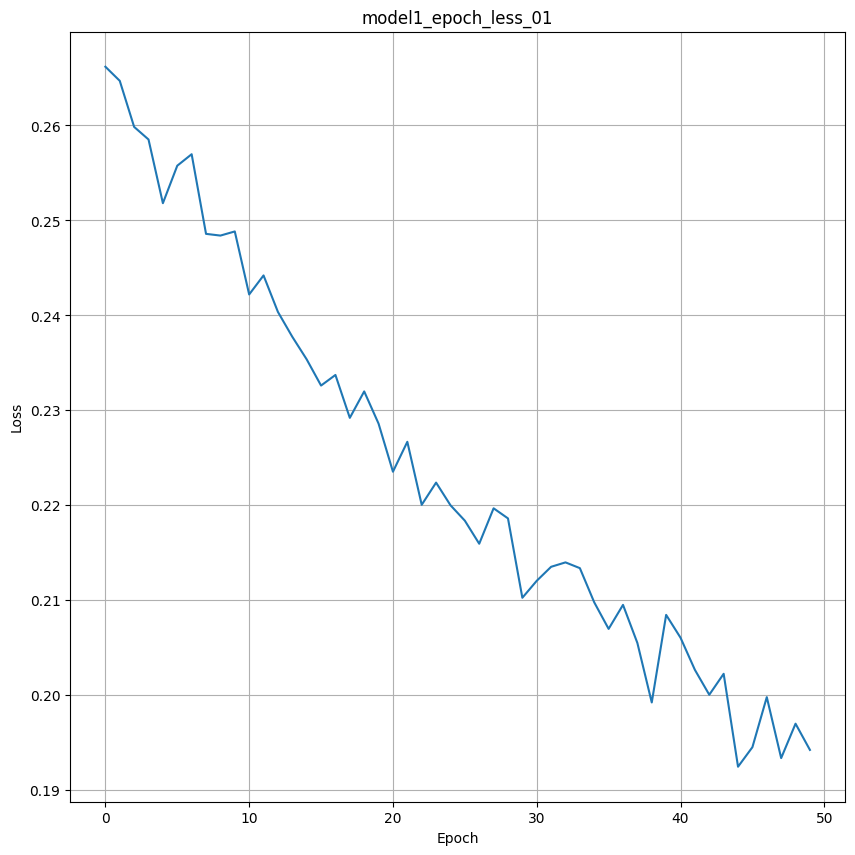

In [20]:
plt.figure(figsize=(10,10))
plt.title("model1_epoch_less_01")
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.savefig("./saveFig/model1_epoch_less_01.png")
plt.show()

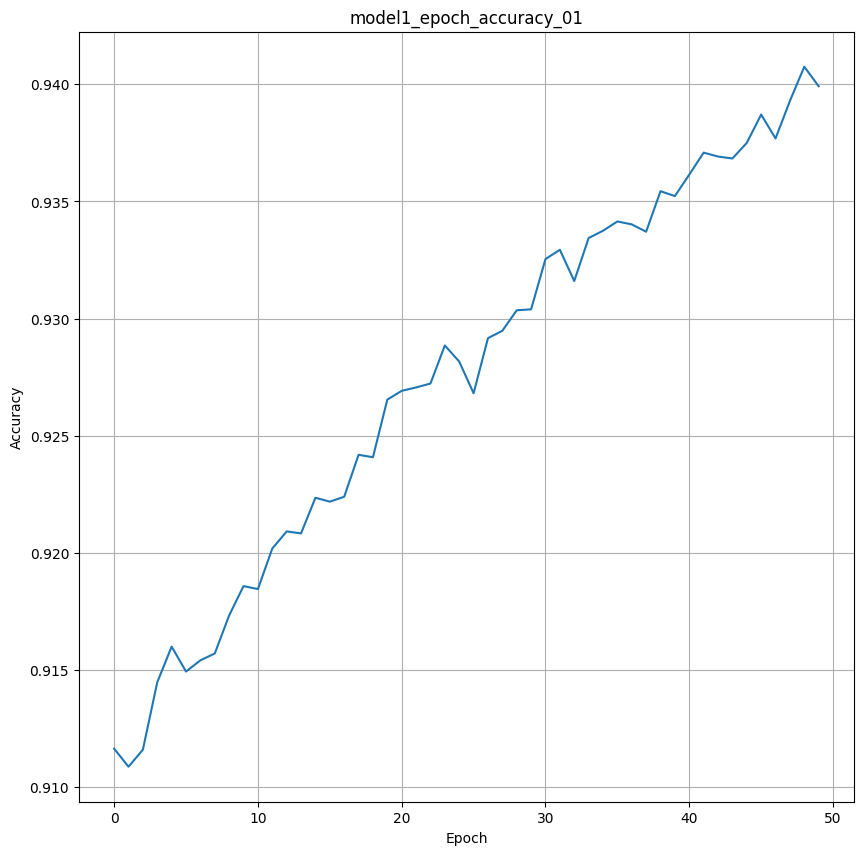

In [21]:
plt.figure(figsize=(10,10))
plt.title("model1_epoch_accuracy_01")
plt.plot(history.epoch, history.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig("./saveFig/model1_epoch_accuracy_01.png")
plt.show()

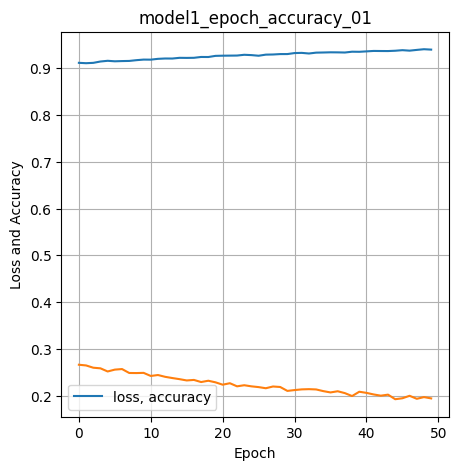

In [23]:
plt.figure(figsize=(5,5))
plt.title("model1_epoch_accuracy_01")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss and Accuracy")
plt.grid()
plt.legend(["loss, accuracy"])
# plt.savefig("./saveFig/model1_epoch_loss_and_accuracy_01.png")
plt.show()

In [24]:
history = model1.fit(X_train_scaled, y_train, epochs=50,
                     validation_data=(X_val_scaled, y_val))

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1952 - accuracy: 0.9397 - val_loss: 1.3479 - val_accuracy: 0.8782
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1907 - accuracy: 0.9413 - val_loss: 1.2077 - val_accuracy: 0.8712
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1923 - accuracy: 0.9408 - val_loss: 1.2598 - val_accuracy: 0.8708
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1888 - accuracy: 0.9410 - val_loss: 1.3441 - val_accuracy: 0.8763
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1923 - accuracy: 0.9415 - val_loss: 1.2357 - val_accuracy: 0.8787
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1908 - accuracy: 0.9425 - val_loss: 1.3201 - val_accuracy: 0.8773
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1837 - accuracy: 0.9430 - val_loss: 1.3968 - val_accuracy:

In [25]:
history.history

{'loss': [0.19521202147006989,
  0.19071118533611298,
  0.1922924816608429,
  0.18881911039352417,
  0.19230647385120392,
  0.19076892733573914,
  0.18367871642112732,
  0.18411505222320557,
  0.1832762211561203,
  0.1907198131084442,
  0.1898583024740219,
  0.18164676427841187,
  0.18669633567333221,
  0.18853560090065002,
  0.18266168236732483,
  0.1779327243566513,
  0.18001484870910645,
  0.18380825221538544,
  0.17218774557113647,
  0.17386417090892792,
  0.17393961548805237,
  0.1750035434961319,
  0.17758341133594513,
  0.17761725187301636,
  0.17905481159687042,
  0.17119134962558746,
  0.17895492911338806,
  0.18591566383838654,
  0.18050959706306458,
  0.17505516111850739,
  0.1797260195016861,
  0.18141262233257294,
  0.17157958447933197,
  0.16874609887599945,
  0.17415127158164978,
  0.18135139346122742,
  0.18208150565624237,
  0.1721673309803009,
  0.17542828619480133,
  0.17403733730316162,
  0.168288916349411,
  0.16914141178131104,
  0.1713733971118927,
  0.1700186878

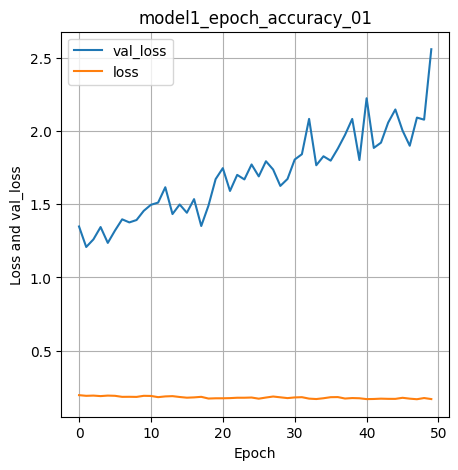

In [28]:
plt.figure(figsize=(5,5))
plt.title("model1_epoch_accuracy_01")
plt.plot(history.epoch, history.history["val_loss"])
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss and val_loss")
plt.grid()
plt.legend(["val_loss", "loss"])
# plt.savefig("./saveFig/model1_epoch_loss_and_accuracy_01.png")
plt.show()

In [29]:
"""
 - 신규모델 생성하기 : 모델명 model2
 - 옵티마이저 adam, 학습율 0.1 사용
 - 훈련횟수 50
 - 훈련 및 검증 손실 시각화 및 해서
 - 훈련 및 검증 정확도 시각화 및 해석
"""

'\n - 신규모델 생성하기 : 모델명 model2\n - 옵티마이저 adam, 학습율 0.1 사용\n - 훈련횟수 50\n - 훈련 및 검증 손실 시각화 및 해서\n - 훈련 및 검증 정확도 시각화 및 해석\n'

In [38]:
model2 = get_model([100])

In [39]:
adam = keras.optimizers.Adam(
    learning_rate=0.1
)

model2.compile(
    optimizer=adam,
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",
    
)

In [40]:
history = model2.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6835 - accuracy: 0.4040 - val_loss: 1.8336 - val_accuracy: 0.4168
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7196 - accuracy: 0.3191 - val_loss: 1.6541 - val_accuracy: 0.3401
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6289 - accuracy: 0.3539 - val_loss: 1.6003 - val_accuracy: 0.3832
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5441 - accuracy: 0.3950 - val_loss: 1.7918 - val_accuracy: 0.4327
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5487 - accuracy: 0.3886 - val_loss: 1.3972 - val_accuracy: 0.3943
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4555 - accuracy: 0.4079 - val_loss: 1.5665 - val_accuracy: 0.4279
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5098 - accuracy: 0.3948 - val_loss: 1.4043 - val_accuracy:

In [41]:
history

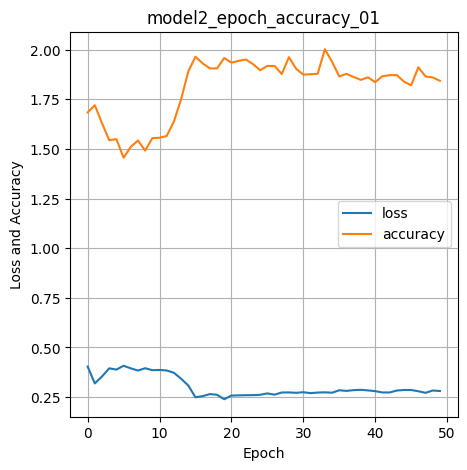

In [42]:
plt.figure(figsize=(5,5))
plt.title("model2_epoch_accuracy_01")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss and Accuracy")
plt.grid()
plt.legend(["loss", "accuracy"])
# plt.savefig("./saveFig/model2_epoch_loss_and_accuracy_01.png")
plt.show()

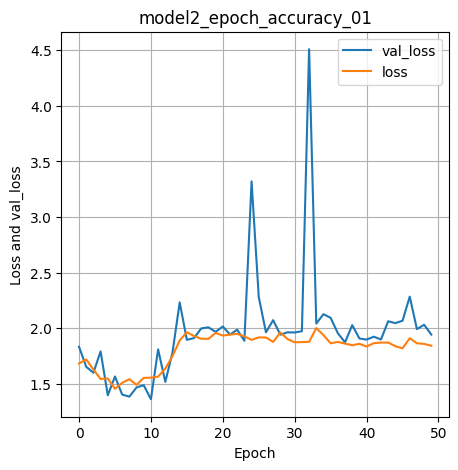

In [43]:
plt.figure(figsize=(5,5))
plt.title("model2_epoch_accuracy_01")
plt.plot(history.epoch, history.history["val_loss"])
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss and val_loss")
plt.grid()
plt.legend(["val_loss", "loss"])
# plt.savefig("./saveFig/model2_epoch_loss_and_accuracy_01.png")
plt.show()

# 성능향상을 위한 성능규제

In [44]:
"""
<성능 규제>
 - 성능(과적합 여부 포함)을 높이기 위한 방법
 - 보통 전처리 계층을 사용하게 됩니다.
 - 전처리 계층은 훈련에 영향을 미치지 않습니다.

<성능 규제 방법>
 * Dropout(드롭아웃) 방법을 사용함
  - 훈련 과정 중에 일부 특성들을 랜덤하게 제외 시켜서 과대/과소 적합을 해소하는 방법
  - 딥러닝에서 자주 사용되는 전처리 계층으로 성능 개선에 효율적으로 사용됨
  - 주로 과대적합이 발생한 경우에 사용하면 일반화에 효과가 있음
    (드롭아웃은 조금 멍청하게 만드는 개념입니다.)
  
 * Dropout 적용방법
  - 은닉계층(Hidden Layer)으로 추가하여 주로 사용됨
  - 제외시킬 값을 비율로 정의 합니다.
"""

'\n<성능 규제>\n - 성능(과적합 여부 포함)을 높이기 위한 방법\n - 보통 전처리 계층을 사용하게 됩니다.\n - 전처리 계층은 훈련에 영향을 미치지 않습니다.\n\n<성능 규제 방법>\n * Dropout(드롭아웃) 방법을 사용함\n  - 훈련 과정 중에 일부 특성들을 랜덤하게 제외 시켜서 과대/과소 적합을 해소하는 방법\n  - 딥러닝에서 자주 사용되는 전처리 계층으로 성능 개선에 효율적으로 사용됨\n  - 주로 과대적합이 발생한 경우에 사용하면 일반화에 효과가 있음\n    (드롭아웃은 조금 멍청하게 만드는 개념입니다.)\n  \n * Dropout 적용방법\n  - 은닉계층(Hidden Layer)으로 추가하여 주로 사용됨\n  - 제외시킬 값을 비율로 정의 합니다.\n'

In [81]:
model = keras.Sequential()

model.add(
    keras.layers.Flatten(
        input_shape=(28,28),
        name="Flatten_input_Layer"
    )
)
model.add(
    keras.layers.Dense(
        units=100,
        activation="relu"
    )
)
model.add(
    keras.layers.Dropout(0.3)
)
model.add(
    keras.layers.Dense(
        units=10,
        activation="softmax",
        name="Output_Layer"
    )
)
adam = keras.optimizers.Adam(
    learning_rate=0.001
)

model.compile(
    optimizer=adam,
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",
)

In [82]:
adam = keras.optimizers.Adam(
    learning_rate=0.1
)

model2.compile(
    optimizer=adam,
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",
    
)

In [48]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5925 - accuracy: 0.7913 - val_loss: 0.4362 - val_accuracy: 0.8391
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8393 - val_loss: 0.3837 - val_accuracy: 0.8593
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4053 - accuracy: 0.8530 - val_loss: 0.3696 - val_accuracy: 0.8659
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3860 - accuracy: 0.8588 - val_loss: 0.3606 - val_accuracy: 0.8677
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8664 - val_loss: 0.3433 - val_accuracy: 0.8711
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3532 - accuracy: 0.8698 - val_loss: 0.3417 - val_accuracy: 0.8767
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3439 - accuracy: 0.8735 - val_loss: 0.3396 - val_accuracy:

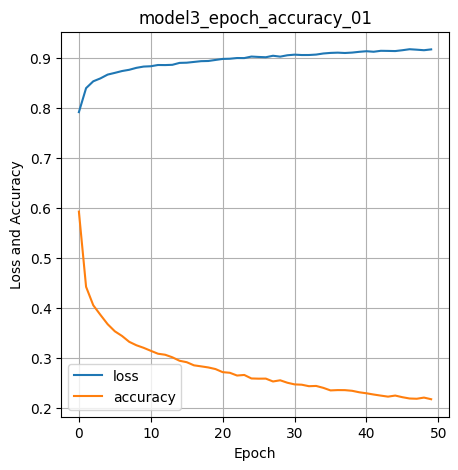

In [49]:
plt.figure(figsize=(5,5))
plt.title("model3_epoch_accuracy_01")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss and Accuracy")
plt.grid()
plt.legend(["loss", "accuracy"])
# plt.savefig("./saveFig/model3_epoch_loss_and_accuracy_01.png")
plt.show()

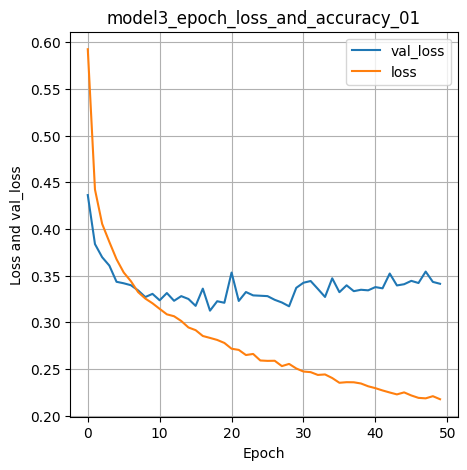

In [50]:
plt.figure(figsize=(5,5))
plt.title("model3_epoch_loss_and_accuracy_01")
plt.plot(history.epoch, history.history["val_loss"])
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss and val_loss")
plt.grid()
plt.legend(["val_loss", "loss"])
# plt.savefig("./saveFig/model3_epoch_loss_and_accuracy_01.png")
plt.show()

In [52]:
model.save_weights("./model/model_weights.h5")

In [53]:
"""
<최적화 시점의 모델 저장>
 - 훈련 반복 중 가장 좋은 시점(손실이 적거나, 더이상 손실이 낮아지지 않는 시점)에
   모델을 저장해서 사용하는 방법을 의미합니다.
 
<저장 방법>
 1. 최적의 모델이 훈련 중 사용한 가중치만 저장하는 방법
    - 훈련 중 손실을 줄이기 위해 모델이 스스로 찾아낸 가중치 값들
    - 읽어들이는 순서
       -- 모델 생성 > 저장된 가중치 읽어들여서 적용 > 예측 진행
          (훈련 fit은 별도로 하지 않습니다)
          
 2. 최적의 모델 자체를 저장하는 방법
    - 훈련 최종 결과물 모델 자체를 저장합니다.
    - 읽어들이는 순서
       -- 모델 읽어들이기 > 예측 진행
          (별도로 모델 생성 및 훈련을 하지 않아도 됩니다.)
"""

'\n<최적화 시점의 모델 저장>\n - 훈련 반복 중 가장 좋은 시점(손실이 적거나, 더이상 손실이 낮아지지 않는 시점)에\n   모델을 저장해서 사용하는 방법을 의미합니다.\n \n<저장 방법>\n 1. 최적의 모델이 훈련 중 사용한 가중치만 저장하는 방법\n    - 훈련 중 손실을 줄이기 위해 모델이 스스로 찾아낸 가중치 값들\n    - 읽어들이는 순서\n       -- 모델 생성 > 저장된 가중치 읽어들여서 적용 > 예측 진행\n          (훈련 fit은 별도로 하지 않습니다)\n          \n 2. 최적의 모델 자체를 저장하는 방법\n    - 훈련 최종 결과물 모델 자체를 저장합니다.\n    - 읽어들이는 순서\n       -- 모델 읽어들이기 > 예측 진행\n          (별도로 모델 생성 및 훈련을 하지 않아도 됩니다.)\n'

In [74]:
# 저장된 가중치값 읽어들여서 사용
# - 가중치는 값만 있고, 모델이 없기 떄문에 모델을 생성해서 읽어들인 가중치를 모델에 넣어주어야한다.
model = keras.Sequential()

model.add(
    keras.layers.Flatten(
        input_shape=(28,28),
        name="Flatten_input_Layer"
    )
)
model.add(
    keras.layers.Dense(
        units=100,
        activation="relu"
    )
)
model.add(
    keras.layers.Dropout(0.3)
)
model.add(
    keras.layers.Dense(
        units=10,
        activation="softmax",
        name="Output_Layer"
    )
)

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_input_Layer (Flatte  (None, 784)              0         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 가중치 적용하기
model.load_weights("./model/model_weights.h5")
adam = keras.optimizers.Adam(
    learning_rate=0.001
)

model.compile(
    optimizer=adam,
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",
)

In [60]:
model.evaluate(X_train_scaled, y_train)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.1553 - accuracy: 0.9413


[0.1552988439798355, 0.9413333535194397]

In [62]:
model.save("./model/model_all.h5")

In [63]:
model_all = keras.models.load_model("./model/model_all.h5")

In [64]:
model_all.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten_input_Layer (Flatte  (None, 784)              0         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_all.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3412 - accuracy: 0.8912


[0.3411661684513092, 0.8911666870117188]

In [70]:
test_pred = model_all.predict(X_test_scaled)
test_pred

array([[1.9977542e-16, 2.0938364e-12, 3.1557059e-22, ..., 1.1509391e-06,
        3.6531178e-13, 9.9798787e-01],
       [1.4208906e-05, 2.6449372e-24, 9.9710828e-01, ..., 0.0000000e+00,
        8.3320490e-14, 8.8792382e-29],
       [2.0800249e-15, 1.0000000e+00, 4.7073608e-19, ..., 0.0000000e+00,
        4.7891724e-28, 0.0000000e+00],
       ...,
       [6.2025281e-11, 5.1107459e-27, 4.5422931e-14, ..., 4.7743051e-21,
        1.0000000e+00, 4.5746813e-25],
       [2.4655626e-15, 1.0000000e+00, 4.0124438e-15, ..., 8.0238840e-33,
        2.9144318e-16, 3.0461342e-21],
       [3.8301593e-09, 4.1600702e-14, 8.3253760e-12, ..., 1.7718139e-07,
        1.3211321e-06, 7.7911527e-10]], dtype=float32)

In [71]:
test_pred[0]

array([1.9977542e-16, 2.0938364e-12, 3.1557059e-22, 6.9136513e-16,
       1.4468723e-22, 2.0110251e-03, 9.9848566e-18, 1.1509391e-06,
       3.6531178e-13, 9.9798787e-01], dtype=float32)

In [72]:
# 예측결과와 종속변수와 비교하기 위해서는
# - 예측경과의 인덱스 번호를 정수값 1개로 받아와서 비교해야함

np.argmax(test_pred[0])

9

In [73]:
"""
<콜백(Callback) 함수>
 - 모델 훈련 중에 특정 작업(함수)을 호출(call)하여 수행하고자 할 때 사용
 - 훈련 시에 fit 함수에 적용하여 사용합니다.
 - 훈련 중에 발생시키는 함수라는 의미로 -> "이벤트(event) 함수"라고도 칭합니다.
 - 별도의 계층은 아니며, fit함수의 속성(매개변수)로 사용됩니다.

<콜백(Callback) 함수 종류>
 1. ModelCheckpoint() 함수 : 모델(model) 확인(check) 시점(point) 확인 함수
  - epoch 마다 모델을 저장하는 기능을 수행하는 함수
  - 단, 이전 epoch에서 실행된 훈련 성능보다 높아진 경우에만 저장됨
 
 2. EaralyStopping() 함수 : 조기(earaly) 종료(stopping) 함수
  - 훈련이 더 이상 좋와지지 않으면(loss 기준) 훈련을 종료시키는 함수
  - 일반적으로 ModelCheckpoint()와 함께 사용함
"""

'\n<콜백(Callback) 함수>\n - 모델 훈련 중에 특정 작업(함수)을 호출(call)하여 수행하고자 할 때 사용\n - 훈련 시에 fit 함수에 적용하여 사용합니다.\n - 훈련 중에 발생시키는 함수라는 의미로 -> "이벤트(event) 함수"라고도 칭합니다.\n - 별도의 계층은 아니며, fit함수의 속성(매개변수)로 사용됩니다.\n\n<콜백(Callback) 함수 종류>\n 1. ModelCheckpoint() 함수 : 모델(model) 확인(check) 시점(point) 확인 함수\n  - epoch 마다 모델을 저장하는 기능을 수행하는 함수\n  - 단, 이전 epoch에서 실행된 훈련 성능보다 높아진 경우에만 저장됨\n \n 2. EaralyStopping() 함수 : 조기(earaly) 종료(stopping) 함수\n  - 훈련이 더 이상 좋와지지 않으면(loss 기준) 훈련을 종료시키는 함수\n  - 일반적으로 ModelCheckpoint()와 함께 사용함\n'

In [75]:
# 콜백 함수(ModelCheckpoint) 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "./model/best_model5.h5",
    # 모델 저장 방법 정의
    # save_best_only=True : 모델 성능이 가장 좋은 시점에만 저장시키기
    # save_best_only=False : 
    save_best_only=True
)

In [78]:
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[checkpoint_cb])

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2192 - accuracy: 0.9158 - val_loss: 0.3452 - val_accuracy: 0.8921
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2127 - accuracy: 0.9175 - val_loss: 0.3526 - val_accuracy: 0.8892
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2144 - accuracy: 0.9173 - val_loss: 0.3625 - val_accuracy: 0.8878
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2133 - accuracy: 0.9187 - val_loss: 0.3467 - val_accuracy: 0.8920
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2126 - accuracy: 0.9180 - val_loss: 0.3536 - val_accuracy: 0.8918
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2068 - accuracy: 0.9207 - val_loss: 0.3589 - val_accuracy: 0.8884
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2120 - accuracy: 0.9188 - val_loss: 0.3721 - val_accuracy:

In [79]:
best_model = keras.models.load_model("./model/best_model5.h5")
best_model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3452 - accuracy: 0.8921


[0.3452092409133911, 0.8920833468437195]

In [83]:
# 콜백 함수(EarlyStopping) 생성
early_stopping_cb = keras.callbacks.EarlyStopping(
    # 성능이 더 이상 좋아지지 않는 epoch의 갯수 지정
    # - 가장 좋은 시점의 epoch 이후 2번 더 수행 후
    # - 그래도 좋아지지 않으면 종료 시키는 함수
    # - 주로 2 또는 3 사용
    patience=2,
    # 종료 시점에 가장 낮은 검증 손실일 때의
    # - 하이퍼파라미터로 모델을 업데이트 시킴(가중치 업데이트)
    restore_best_weights=True
)

In [84]:
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5944 - accuracy: 0.7915 - val_loss: 0.4232 - val_accuracy: 0.8487
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4391 - accuracy: 0.8416 - val_loss: 0.3911 - val_accuracy: 0.8601
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4081 - accuracy: 0.8514 - val_loss: 0.3680 - val_accuracy: 0.8660
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3834 - accuracy: 0.8586 - val_loss: 0.3564 - val_accuracy: 0.8693
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3688 - accuracy: 0.8639 - val_loss: 0.3514 - val_accuracy: 0.8686
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8676 - val_loss: 0.3486 - val_accuracy: 0.8702
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3465 - accuracy: 0.8734 - val_loss: 0.3341 - val_accuracy:

In [87]:
best_model2 = keras.models.load_model("./model/best_model5.h5")

best_model2.evaluate(X_train_scaled, y_train)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.2647 - accuracy: 0.9002


[0.2647465169429779, 0.9002083539962769]

In [88]:
best_model2.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8798


[0.32759785652160645, 0.8798333406448364]